In [1]:
#Data Manipulation
import pandas as pd
import numpy as np

#Data Visualization
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_norm = pd.read_csv("healthcare-dataset-stroke-data.csv", index_col="id")
df_synt = pd.read_csv("synthetic_train.csv", index_col="id")

pd.set_option('display.max_columns', None)

print(f"Normal dataset unique columns: {list(df_norm.columns)}")
print(f"Normal dataset number of rows and columns: {df_norm.shape}")
print("----------------------------------------------------------------------------")
print(f"Synthetic dataset unique columns: {list(df_synt.columns)}")
print(f"Synthetic dataset number of rows and columns: {df_synt.shape}")

Normal dataset unique columns: ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']
Normal dataset number of rows and columns: (5110, 11)
----------------------------------------------------------------------------
Synthetic dataset unique columns: ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']
Synthetic dataset number of rows and columns: (15304, 11)


In [3]:
df_total = pd.concat([df_norm, df_synt])

In [4]:
print(df_total.shape)
df_total

(20414, 11)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0
15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0
15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0


In [5]:
df_total.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df_total = df_total.dropna()

In [7]:
df = df_total.copy()
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0
15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0
15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0


In [8]:
#Label Encoding

df.loc[df.gender == "Male", "gender"] = 0
df.loc[df.gender != 0, "gender"] = 1
df["gender"] = df["gender"].astype(int)

df.loc[df.ever_married == "Yes", "ever_married"] = 0
df.loc[df.ever_married != 0, "ever_married"] = 1
df["ever_married"] = df["ever_married"].astype(int)

df.loc[df.Residence_type == "Urban", "Residence_type"] = 0
df.loc[df.Residence_type != 0, "Residence_type"] = 1
df["Residence_type"] = df["Residence_type"].astype(int)

# Standartization

df["avg_glucose_level"] = (df.avg_glucose_level - df.avg_glucose_level.mean()) / df.avg_glucose_level.std()
df["age"] = (df.age - df.age.mean()) / df.age.std()
df["bmi"] = (df.bmi - df.bmi.mean()) / df.bmi.std()

In [9]:
df = pd.get_dummies(data=df, columns=["work_type", "smoking_status"])

In [10]:
print(df.shape)
df

(20213, 18)


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,,,
9046,0,1.161213,0,1,0,0,4.250449,1.181714,1,0,0,1,0,0,0,1,0,0
31112,0,1.759523,0,1,0,1,0.404996,0.597816,1,0,0,1,0,0,0,0,1,0
60182,1,0.332785,0,0,0,0,2.450663,0.868403,1,0,0,1,0,0,0,0,0,1
1665,1,1.713499,1,0,0,1,2.541185,-0.612706,1,0,0,0,1,0,0,0,1,0
56669,0,1.805547,0,0,0,0,2.919873,0.099365,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15299,1,-0.909858,0,0,1,0,-0.637728,-1.253571,0,1,0,0,0,0,0,0,1,0
15300,1,0.194713,1,0,0,0,0.256841,0.540850,0,0,0,1,0,0,0,0,1,0
15301,1,1.529404,0,0,0,0,-0.166012,-0.299395,0,0,0,0,1,0,0,0,1,0


In [11]:
features = list(df.columns)
features.remove("stroke")
print(features)

['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level', 'bmi', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']


In [12]:
import torch
from torch.utils.data import Dataset, DataLoader

class MakeDataset(Dataset):
    def __init__(self, df):
        x = df[features].values
        y = df["stroke"].values
        self.x_train=torch.tensor(x,dtype=torch.float32)
        self.y_train=torch.tensor(y,dtype=torch.float32)
        
    def __len__(self):
        return len(self.y_train)
    
    def __getitem__(self,idx):
        return self.x_train[idx], self.y_train[idx]


In [13]:
# You may or may not want to use this, it basically makes all batches divide into stroke: 1 and stroke: 2 equally

import torch.utils.data
import random

# Courtesy of galatolofederico
#https://github.com/galatolofederico/pytorch-balanced-batch/blob/master/example.py

class BalancedBatchSampler(torch.utils.data.sampler.Sampler):
    def __init__(self, dataset, labels=None):
        self.labels = labels
        self.dataset = dict()
        self.balanced_max = 0
        # Save all the indices for all the classes
        for idx in range(0, len(dataset)):
            label = self._get_label(dataset, idx)
            if label not in self.dataset:
                self.dataset[label] = list()
            self.dataset[label].append(idx)
            self.balanced_max = len(self.dataset[label]) \
                if len(self.dataset[label]) > self.balanced_max else self.balanced_max
        
        # Oversample the classes with fewer elements than the max
        for label in self.dataset:
            while len(self.dataset[label]) < self.balanced_max:
                self.dataset[label].append(random.choice(self.dataset[label]))
        self.keys = list(self.dataset.keys())
        self.currentkey = 0
        self.indices = [-1]*len(self.keys)

    def __iter__(self):
        while self.indices[self.currentkey] < self.balanced_max - 1:
            self.indices[self.currentkey] += 1
            yield self.dataset[self.keys[self.currentkey]][self.indices[self.currentkey]]
            self.currentkey = (self.currentkey + 1) % len(self.keys)
        self.indices = [-1]*len(self.keys)
    
    def _get_label(self, dataset, idx, labels = None):
        if self.labels is not None:
            return self.labels[idx].item()
        else:
            raise Exception("You should pass the tensor of labels to the constructor as second argument")

    def __len__(self):
        return self.balanced_max*len(self.keys)

In [14]:
import torch.nn as nn

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.l2 = nn.Linear(hidden_size, num_classes) 
        self.lrelu = nn.LeakyReLU(negative_slope=0.01)
        self.sigmoid = nn.Sigmoid()
        
        self.dropout = nn.Dropout(0.2)
    
    def forward(self, x):
        out = self.l1(x)
        out = self.dropout(out)
        out = self.lrelu(out)
        out = self.l2(out)
        out = self.dropout(out)
        out = self.sigmoid(out)
        
        return out

In [15]:
def model_train(model, train_loader, valid_loader, num_epochs):
    history = {"train_loss": [], "valid_loss": [], "epochs": []}
    
    for epoch in range(num_epochs):
        history["epochs"].append(epoch)
        
        train_loss_log = []
        valid_loss_log = []
        sample_size_train = 0
        sample_size_valid = 0
        
        model.train()
        for samples, labels in train_loader:

            #print(samples.shape)
            #print(labels.shape)
            samples = samples.to(device)
            labels = labels.to(device)
            #print(labels)
            
            # Train Loss
            outputs = model(samples)
            outputs = outputs.view(-1)
            
            train_loss = criterion(outputs, labels)
            #print(train_loss)
            
            train_loss_log.append(train_loss.item() * len(samples))
            #print(len(samples))
            sample_size_train += len(samples)
             
            # Backward and optimize
            optimizer.zero_grad()
            train_loss.backward()
            optimizer.step()
            
        model.eval()
        for samples, labels in valid_loader:
            #print(samples.shape)
            #print(labels.shape)
            samples = samples.to(device)
            labels = labels.to(device)
        
            # Valid Loss
            outputs = model(samples)
            outputs = outputs.view(-1)
            
            valid_loss = criterion(outputs, labels)
            valid_loss_log.append(valid_loss.item() * len(samples))
            #print(len(samples))
            sample_size_valid += len(samples)
        
        history["train_loss"].append(sum(train_loss_log) / sample_size_train)
        history["valid_loss"].append(sum(valid_loss_log) / sample_size_valid)
        
        
    return history

In [16]:
import torchmetrics

def model_test(model, test_loader):
    model.eval()
    #AUROC metric
    
    with torch.no_grad():
        tp = 0
        tn = 0
        fp = 0
        fn = 0
        
        for samples, labels in test_loader:
            outputs = model(samples)
            #outputs = sigmoid(outputs.item())
            
            # 0.5 threshold performance
            for output, label in zip(outputs, labels):
                predicted_wtreshold = round(output.item())
            
                if int(label) == 1:
                    if predicted_wtreshold == 1:
                        tp += 1
                    elif predicted_wtreshold == 0:
                        fn += 1
                    
                elif int(label) == 0:
                    if predicted_wtreshold == 1:
                        fp += 1
                    elif predicted_wtreshold == 0:
                        tn += 1
                    
            # ROC - AUROC
            pred = outputs
            pred = pred.view(-1)
            #print(pred.shape)
            #print(label.shape)

            #roc = torchmetrics.ROC(task="binary")
            #fpr, tpr, thresholds = roc(pred, label.to(torch.long))
            auroc = torchmetrics.AUROC(task="binary")
            auc_score = auroc(pred, labels.to(torch.long)).item()
                    
        tpr = tp / (tp + fn)
        tnr = tn / (tn + fp)
        balanced_acc = (tpr + tnr) / 2
            
    return auc_score, balanced_acc, tp, tn, fp, fn

Fold 1 finished
Sensitivity: 0.8520710059171598 , Specificity: 0.7632937532266392
Balanced Accuracy: 0.8076823795718995
AUROC Score: 0.878699779510498
-------------------------------------------------------------------------
Fold 2 finished
Sensitivity: 0.7976190476190477 , Specificity: 0.7956129032258065
Balanced Accuracy: 0.7966159754224271
AUROC Score: 0.8716052770614624
-------------------------------------------------------------------------
Fold 3 finished
Sensitivity: 0.8095238095238095 , Specificity: 0.7538064516129033
Balanced Accuracy: 0.7816651305683564
AUROC Score: 0.8708924651145935
-------------------------------------------------------------------------
Fold 4 finished
Sensitivity: 0.8333333333333334 , Specificity: 0.7547754259163655
Balanced Accuracy: 0.7940543796248494
AUROC Score: 0.86551833152771
-------------------------------------------------------------------------
Fold 5 finished
Sensitivity: 0.7916666666666666 , Specificity: 0.7702632937532267
Balanced Accuracy

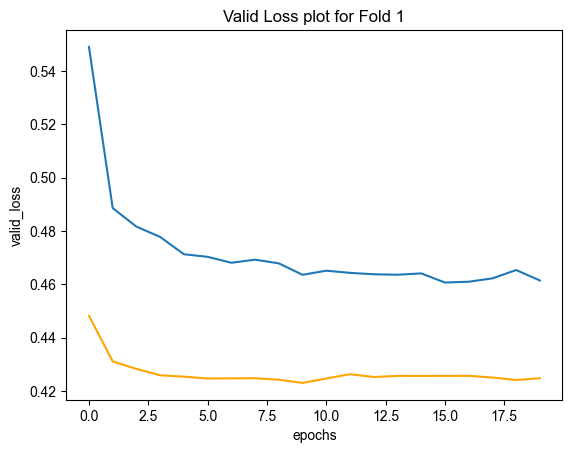

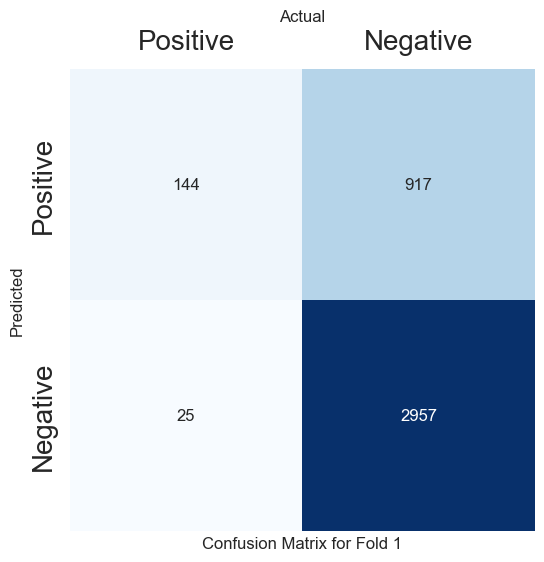

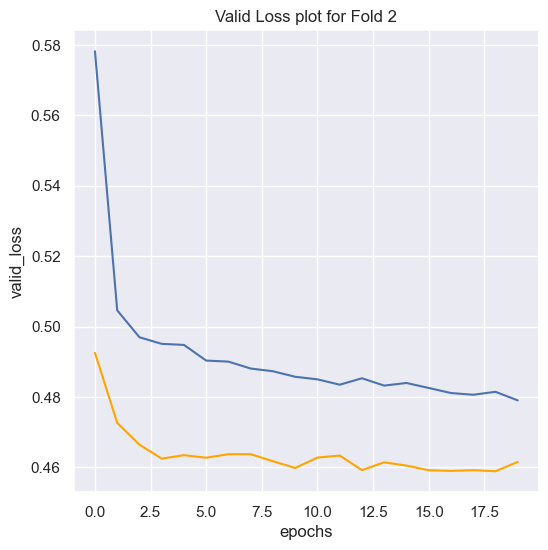

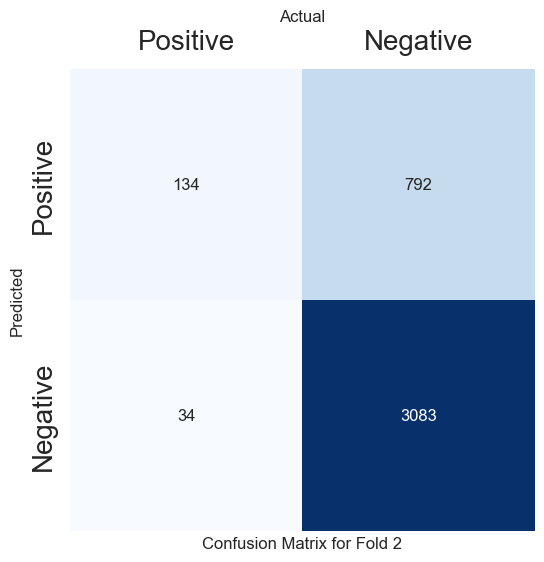

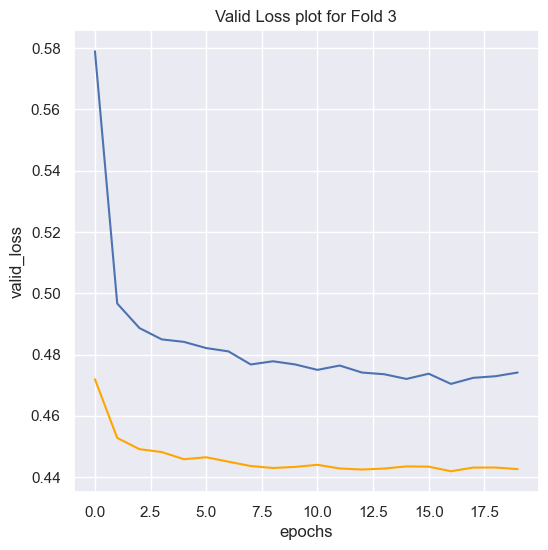

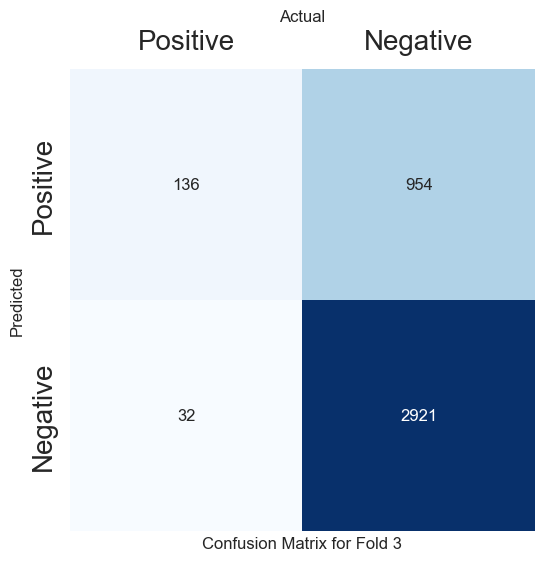

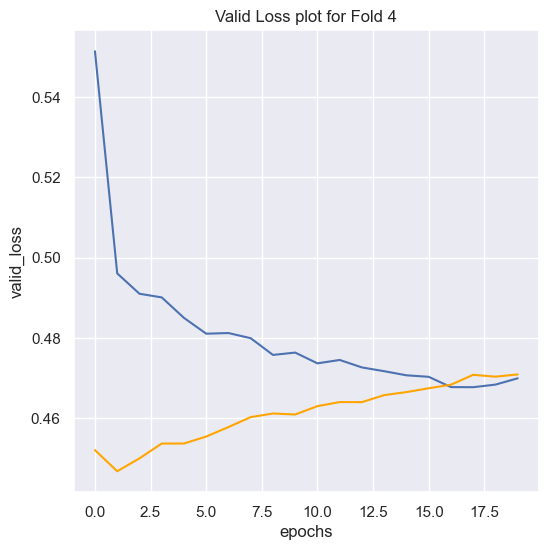

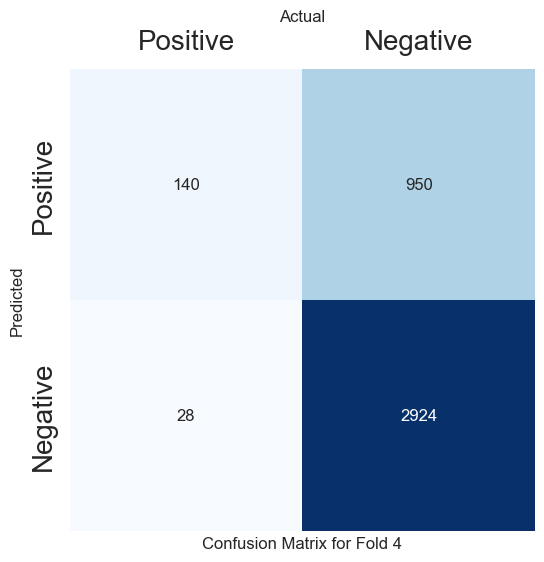

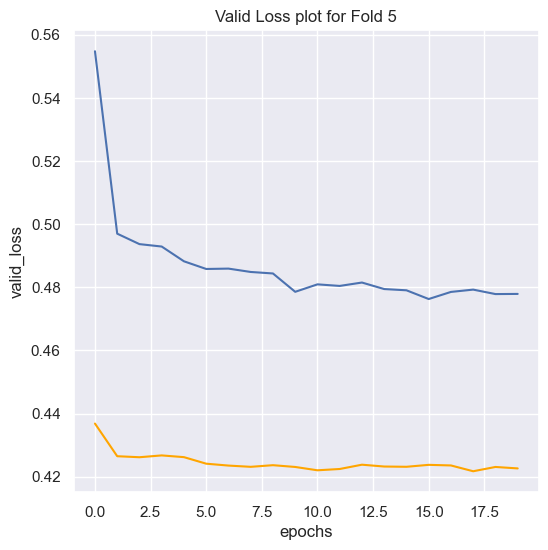

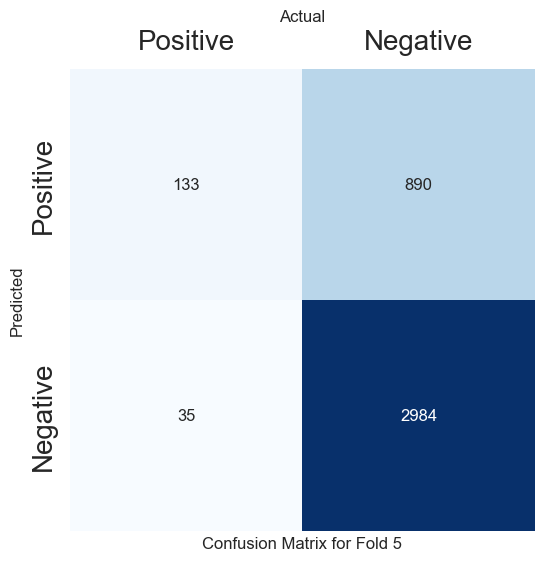

In [17]:
#from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

#kfold = KFold(n_splits=5, shuffle=True)
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True)
fold_no = 1

auc_score_log = []
balanced_acc_log = []

tp_log = []
fp_log = []
tn_log = []
fn_log = []

for train, test in stratified_kfold.split(df, df.stroke):
    input_size = len(features)
    hidden_size = 10  
    num_classes = 1
    learning_rate = 0.001
    epochs = 20

    model = Net(input_size, hidden_size, num_classes).to(device)

    # Loss and optimizer
    #criterion = nn.BCEWithLogitsLoss()
    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay = 0.001)
     
    train_dataset = MakeDataset(df.iloc[train])
    valid_dataset = MakeDataset(df.iloc[test])
    test_dataset = MakeDataset(df.iloc[test])
    #print(train_dataset.y_train)
    #print(train_dataset.x_train)
    
    # fold statistics
    # fixed seed, seed for loop
    # for loop inside fold
    
    # Custom made sampler instead of shuffle to get balanced batches
    train_loader = DataLoader(train_dataset, batch_size=64,
                              sampler=BalancedBatchSampler(train_dataset, train_dataset.y_train))
    valid_loader = DataLoader(valid_dataset, batch_size=64,
                             sampler=BalancedBatchSampler(valid_dataset, valid_dataset.y_train))
    test_loader = DataLoader(test_dataset, batch_size=len(test), shuffle=False)
    
    history = model_train(model, train_loader, valid_loader, epochs)
    history = pd.DataFrame(history)
    
    auc_score, balanced_acc, tp, tn, fp, fn = model_test(model, test_loader)
    tpr = tp / (tp + fn)
    tnr = tn / (tn + fp) 
    
    auc_score_log.append(auc_score)
    balanced_acc_log.append(balanced_acc)
    tp_log.append(tp)
    tn_log.append(tn)
    fp_log.append(fp)
    fn_log.append(fn)
    
    print(f"Fold {fold_no} finished")
    print("Sensitivity:", tpr, ", Specificity:", tnr)
    print("Balanced Accuracy:", balanced_acc)
    print("AUROC Score:", auc_score)
    plt.figure()
    sns.lineplot(data=history, x="epochs", y="train_loss")
    plt.title(f'Train Loss plot for Fold {fold_no}')
    plt.ylabel('train_loss')
    plt.xlabel('epochs')
    
    #plt.figure()
    sns.lineplot(data=history, x="epochs", y="valid_loss", color="orange")
    plt.title(f'Valid Loss plot for Fold {fold_no}')
    plt.ylabel('valid_loss')
    plt.xlabel('epochs')
    
    cf_matrix = pd.DataFrame([[tp, fp],
                 [fn, tn]], columns = ['Positive','Negative'], index = ['Positive','Negative'])
    sns.set (rc = {'figure.figsize':(6, 6)})
    plt.figure()
    sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False, fmt='g')
    plt.tick_params(axis='both', which='major', labelsize=20, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.title('Actual')
    plt.ylabel('Predicted')
    plt.xlabel(f'Confusion Matrix for Fold {fold_no}')
    
    fold_no += 1
    print("-------------------------------------------------------------------------")
    
    #break


print("Mean balanced accuracy", sum(balanced_acc_log) / len(balanced_acc_log))
print("Mean AUROC score", sum(auc_score_log) / len(auc_score_log))

Sensitivity: 0.8347205707491082 , Specificity: 0.7768428659921536
Balanced Accuracy: 0.8057817183706308
AUROC Score: 0.8815397620201111
-----------------------------------------------------------------------------------------


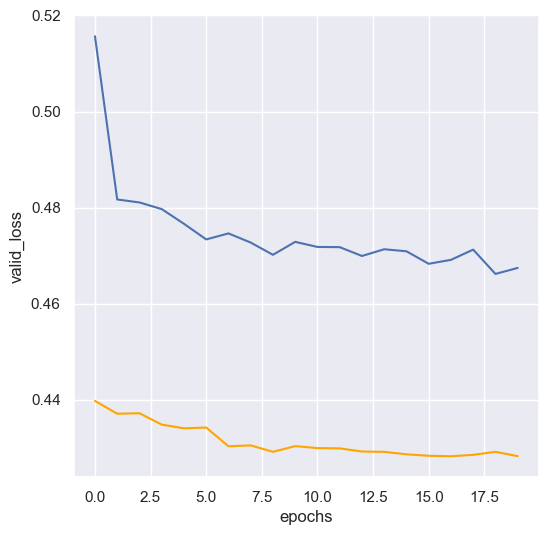

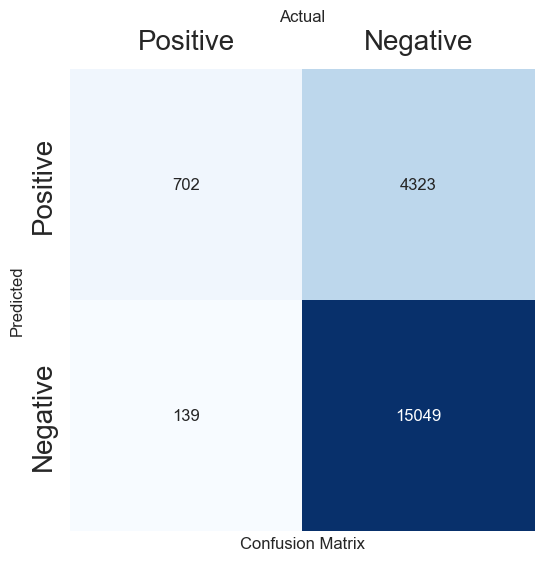

In [18]:
input_size = len(features)
hidden_size = 16  
num_classes = 1
learning_rate = 0.001
epochs = 20

model = Net(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
#criterion = nn.BCEWithLogitsLoss()
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay = 0.001)

train_dataset = MakeDataset(df)
train_loader = DataLoader(train_dataset, batch_size=32, sampler=BalancedBatchSampler(train_dataset, train_dataset.y_train))
valid_loader = DataLoader(train_dataset, batch_size=32, sampler=BalancedBatchSampler(train_dataset, train_dataset.y_train))
test_loader = DataLoader(train_dataset, batch_size=df.shape[0])

history = model_train(model, train_loader, valid_loader, epochs)
history = pd.DataFrame(history)

auc_score, balanced_acc, tp, tn, fp, fn = model_test(model, test_loader)
tpr = tp / (tp + fn)
tnr = tn / (tn + fp) 

print("Sensitivity:", tpr, ", Specificity:", tnr)
print("Balanced Accuracy:", balanced_acc)
print("AUROC Score:", auc_score)
plt.figure()
sns.lineplot(data=history, x="epochs", y="train_loss")
plt.ylabel('train_loss')
plt.xlabel('epochs')
    
#plt.figure()
sns.lineplot(data=history, x="epochs", y="valid_loss", color="orange")
plt.ylabel('valid_loss')
plt.xlabel('epochs')
    
cf_matrix = pd.DataFrame([[tp, fp],
                 [fn, tn]], columns = ['Positive','Negative'], index = ['Positive','Negative'])
sns.set (rc = {'figure.figsize':(6, 6)})
plt.figure()
sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False, fmt='g')
plt.tick_params(axis='both', which='major', labelsize=20, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.title('Actual')
plt.ylabel('Predicted')
plt.xlabel(f'Confusion Matrix')
print("-----------------------------------------------------------------------------------------")

In [19]:
df_test = pd.read_csv("test.csv", index_col="id")
df_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
id,,,,,,,,,,
15304,Female,57.0,0,0,Yes,Private,Rural,82.54,33.4,Unknown
15305,Male,70.0,1,0,Yes,Private,Urban,72.06,28.5,Unknown
15306,Female,5.0,0,0,No,children,Urban,103.72,19.5,Unknown
15307,Female,56.0,0,0,Yes,Govt_job,Urban,69.24,41.4,smokes
15308,Male,32.0,0,0,Yes,Private,Rural,111.15,30.1,smokes
...,...,...,...,...,...,...,...,...,...,...
25503,Female,27.0,0,0,No,Private,Urban,75.77,17.6,never smoked
25504,Male,49.0,0,0,Yes,Private,Urban,102.91,26.7,Unknown
25505,Female,3.0,0,0,No,children,Rural,104.04,18.3,Unknown


In [20]:
#Label Encoding

df_test.loc[df_test.gender == "Male", "gender"] = 0
df_test.loc[df_test.gender != 0, "gender"] = 1
df_test["gender"] = df_test["gender"].astype(int)

df_test.loc[df_test.ever_married == "Yes", "ever_married"] = 0
df_test.loc[df_test.ever_married != 0, "ever_married"] = 1
df_test["ever_married"] = df_test["ever_married"].astype(int)

df_test.loc[df_test.Residence_type == "Urban", "Residence_type"] = 0
df_test.loc[df_test.Residence_type != 0, "Residence_type"] = 1
df_test["Residence_type"] = df_test["Residence_type"].astype(int)

# Standartization

df_test["avg_glucose_level"] = (df_test.avg_glucose_level - df_test.avg_glucose_level.mean()) / df_test.avg_glucose_level.std()
df_test["age"] = (df_test.age - df_test.age.mean()) / df_test.age.std()
df_test["bmi"] = (df_test.bmi - df_test.bmi.mean()) / df_test.bmi.std()

In [21]:
df_test = pd.get_dummies(data=df_test, columns=["work_type", "smoking_status"])

In [22]:
df_test

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,,
15304,1,0.714727,0,0,0,1,-0.256914,0.765927,0,0,1,0,0,1,0,0,0
15305,0,1.330901,1,0,0,0,-0.661323,0.038262,0,0,1,0,0,1,0,0,0
15306,1,-1.749966,0,0,1,0,0.560393,-1.298267,0,0,0,0,1,1,0,0,0
15307,1,0.667329,0,0,0,0,-0.770143,1.953953,1,0,0,0,0,0,0,0,1
15308,0,-0.470222,0,0,0,1,0.847107,0.275867,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25503,1,-0.707211,0,0,1,0,-0.518159,-1.580423,0,0,1,0,0,0,0,1,0
25504,0,0.335544,0,0,0,0,0.529136,-0.229044,0,0,1,0,0,1,0,0,0
25505,1,-1.844762,0,0,1,1,0.572742,-1.476471,0,0,0,0,1,1,0,0,0


In [23]:
input_data = df_test.values
print(input_data)
input_tensor = torch.tensor(input_data, dtype=torch.float32)
print(input_tensor)


[[ 1.          0.71472735  0.         ...  0.          0.
   0.        ]
 [ 0.          1.33090077  1.         ...  0.          0.
   0.        ]
 [ 1.         -1.74996633  0.         ...  0.          0.
   0.        ]
 ...
 [ 1.         -1.84476224  0.         ...  0.          0.
   0.        ]
 [ 0.         -0.51761949  0.         ...  0.          1.
   0.        ]
 [ 1.         -1.89216019  0.         ...  0.          0.
   0.        ]]
tensor([[ 1.0000,  0.7147,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  1.3309,  1.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 1.0000, -1.7500,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 1.0000, -1.8448,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000, -0.5176,  0.0000,  ...,  0.0000,  1.0000,  0.0000],
        [ 1.0000, -1.8922,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])


In [26]:
with torch.no_grad():
    outputs = model(input_tensor)
    print(outputs)
    print(outputs.shape)

tensor([[0.4566],
        [0.8111],
        [0.0430],
        ...,
        [0.0324],
        [0.0659],
        [0.0278]])
torch.Size([10204, 1])


In [27]:
sub_file = open("subOneLayer.csv", "w")

ID = 15304
run = 0

sub_file.write("id,stroke\n")
for output in outputs:
    sub_file.write(f"{ID},{output.item()}\n")
    ID += 1
    run +=1
    
print(run)

10204
